<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/ready/LGBMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
!pip install flaml

In [157]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mannwhitneyu,ttest_ind, kruskal,chisquare, pearsonr, spearmanr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
!pip install colorama
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
!pip install catboost
from catboost import CatBoostClassifier

In [159]:
data = pd.read_csv('/content/covid_data_6_mistakes (1).csv')
data=data.drop('Unnamed: 0', axis=1)
X = data.drop('Ab_ind', axis=1)  
Y = data['Ab_ind'] 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, stratify = Y, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20,  random_state = 42)

In [160]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

In [161]:
''' import AutoML class from flaml package '''
from flaml import AutoML
automl = AutoML()

In [162]:

settings = {
    "time_budget": 60, # total running time in seconds
    "metric": 'f1', # primary metrics can be chosen from: ['accuracy','roc_auc','f1','log_loss','mae','mse','r2']
    "estimator_list": ['lgbm', 'rf', 'xgboost'], # list of ML learners
    "task": 'classification', # task type    
    "sample": False, # whether to subsample training data
    "log_file_name": 'xgblgbm.log', # flaml log file
}

In [163]:
!pip install mlflow

In [164]:
import mlflow
mlflow.set_experiment("flaml")
with mlflow.start_run() as run:
    '''The main flaml automl API'''
    automl.fit(X_train = X_train, y_train = y_train, **settings)

[flaml.automl: 02-25 06:26:29] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 06:26:29] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 06:26:29] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 06:26:29] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 06:26:29] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 06:26:29] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 06:26:29] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 06:26:29] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 06:26:29] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 06:26:29] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 06:26:29] {874} INFO - Minimizing error metric: 1-f1
[flaml.automl: 02-25 06:26:29] {874} INFO - Minimizing error metric: 1-f1
[flaml.automl: 02-25 06:26:29] {874} INFO - Minimizing error metric: 1-f1
[flaml.automl: 02-25 06:26:29] {874} INFO - Minimizing error metric: 1-f1
[flaml.automl: 02-25 06:26:29] {874} INFO - 

In [165]:
''' retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)

print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: xgboost
Best hyperparmeter config: {'n_estimators': 8.0, 'max_leaves': 11.0, 'min_child_weight': 0.652968279758089, 'learning_rate': 1.0, 'subsample': 0.8812125215109999, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.8634485746059544, 'reg_alpha': 5.816001648589984e-09, 'reg_lambda': 0.6060790557075476}
Training duration of best run: 0.1926 s


In [166]:
automl.model

XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.8634485746059544,
              grow_policy='lossguide', learning_rate=1.0, max_depth=0,
              max_leaves=11, min_child_weight=0.652968279758089, n_estimators=8,
              n_jobs=-1, reg_alpha=5.816001648589984e-09,
              reg_lambda=0.6060790557075476, subsample=0.8812125215109999,
              tree_method='hist', verbosity=0)

In [168]:
import xgboost
from xgboost import XGBClassifier


In [169]:
xgb = XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.8634485746059544,
              grow_policy='lossguide', learning_rate=1.0, max_depth=0,
              max_leaves=11, min_child_weight=0.652968279758089, n_estimators=8,
              n_jobs=-1, reg_alpha=5.816001648589984e-09,
              reg_lambda=0.6060790557075476, subsample=0.8812125215109999,
              tree_method='hist', verbosity=0)


In [170]:
xgb.fit(X_train, y_train)


XGBClassifier(colsample_bylevel=1.0, colsample_bytree=0.8634485746059544,
              grow_policy='lossguide', learning_rate=1.0, max_depth=0,
              max_leaves=11, min_child_weight=0.652968279758089, n_estimators=8,
              n_jobs=-1, reg_alpha=5.816001648589984e-09,
              reg_lambda=0.6060790557075476, subsample=0.8812125215109999,
              tree_method='hist', verbosity=0)

In [171]:
confusion_matrix(y_test, xgb.predict(X_test))

array([[130,  13],
       [ 20,  10]])

In [172]:
confusion_matrix(y_val, xgb.predict(X_val))

array([[110,  10],
       [ 14,   4]])

In [173]:
''' pickle and save the best model '''
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(automl.model, f, pickle.HIGHEST_PROTOCOL)

In [194]:
''' compute predictions of testing dataset ''' 
y_pred = automl.predict(X_test)
print(confusion_matrix(y_test,y_pred))


[[131  12]
 [ 22   8]]


In [175]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('accuracy', '=', 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test))
print('roc_auc', '=', 1 - sklearn_metric_loss_score('roc_auc', y_pred_proba, y_test))
print('log_loss', '=', sklearn_metric_loss_score('log_loss', y_pred_proba, y_test))
print('f1', '=', 1 - sklearn_metric_loss_score('f1', y_pred, y_test))

accuracy = 0.8034682080924855
roc_auc = 0.7143356643356643
log_loss = 0.5979293727168257
f1 = 0.32000000000000006


In [205]:
from lightgbm import LGBMClassifier
lg=LGBMClassifier(colsample_bytree=0.9901173566841761, learning_rate=1.0,
               max_bin=511, min_child_weight=0.9842705371351147,
               n_estimators=19, num_leaves=8, objective='binary',
               reg_alpha=3.5697209030862906e-06,
               reg_lambda=0.19094909947197827, class_weight = {0:.02, 1:4.3}
    )
lg.fit(X_train,y_train)
ypred = lg.predict(X_test)
print('With score : ',confusion_matrix(y_test,ypred))

With score :  [[69 74]
 [ 3 27]]


In [210]:
settings = {
    "time_budget": 120, # total running time in seconds
    "metric": 'f1', # primary metrics for regression can be chosen from: ['mae','mse','r2']
    "estimator_list": ['rf'], # list of ML learners; we tune lightgbm in this example
    "task": 'classification', # task type    
    "log_file_name": 'AB_ind_experiment.log', # flaml log file
}

In [211]:
'''The main flaml automl API'''
automl.fit(X_train = X_train, y_train = y_train, **settings)

[flaml.automl: 02-25 07:01:24] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 07:01:24] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 07:01:24] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 07:01:24] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 07:01:24] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 07:01:24] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 07:01:24] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 07:01:24] {853} INFO - Evaluation method: cv
[flaml.automl: 02-25 07:01:24] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 07:01:24] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 07:01:24] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 07:01:24] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 07:01:24] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 07:01:24] {573} INFO - Using StratifiedKFold
[flaml.automl: 02-25 07:01:24] {573} INFO - Using StratifiedKFold
[flaml.aut

In [213]:
''' retrieve best config'''
print('Best hyperparmeter config:', automl.best_config)
print('Best f1 on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best hyperparmeter config: {'n_estimators': 5.0, 'max_features': 0.4435461883034286, 'criterion': 'entropy'}
Best f1 on validation data: 0.4196
Training duration of best run: 1.608 s


In [212]:

automl.model

RandomForestClassifier(criterion='entropy', max_features=0.4435461883034286,
                       n_estimators=5, n_jobs=-1)

In [243]:
rfc = RandomForestClassifier(criterion='entropy', max_features=0.4435461883034286,
                       n_estimators=5, n_jobs=-1, class_weight={0:.0000001, 1:10500000000})
rfc.fit(X_train, y_train)
print(confusion_matrix(y_test, rfc.predict(X_test)))
confusion_matrix(y_val, rfc.predict(X_val))

[[131  12]
 [ 22   8]]


array([[113,   7],
       [ 17,   1]])

In [232]:
|

[[135   8]
 [ 25   5]]


array([[109,  11],
       [ 13,   5]])

In [ ]:
''' pickle and save the best model '''
import pickle
with open('best_model.pkl', 'wb') as f:
    pickle.dump(automl.model, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
''' compute predictions of testing dataset ''' 
y_pred = automl.predict(X_test)
print('Predicted labels', y_pred)
print('True labels', y_test)

Predicted labels [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1]
True labels 687    1
737    0
155    1
538    0
542    0
      ..
318    0
285    0
372    1
669    0
365    1
Name: Ab_ind, Length: 173, dtype: int64


In [ ]:
''' compute different metric values on testing dataset'''
from flaml.ml import sklearn_metric_loss_score
print('r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))
print('mse', '=', sklearn_metric_loss_score('mse', y_pred, y_test))
print('mae', '=', sklearn_metric_loss_score('mae', y_pred, y_test))

r2 = -0.12913752913752896
mse = 0.16184971098265896
mae = 0.16184971098265896


In [ ]:
from flaml.data import get_output_from_log
time_history, best_valid_loss_history, valid_loss_history, config_history, train_loss_history = \
    get_output_from_log(filename = settings['log_file_name'], time_budget = 60)

for config in config_history:
    print(config)

{'Current Learner': 'lgbm', 'Current Sample': 690, 'Current Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 20.0, 'learning_rate': 0.1, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 1e-10, 'reg_lambda': 1.0}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4, 'max_leaves': 4, 'min_child_weight': 20.0, 'learning_rate': 0.1, 'subsample': 1.0, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 1e-10, 'reg_lambda': 1.0}}
{'Current Learner': 'lgbm', 'Current Sample': 690, 'Current Hyper-parameters': {'n_estimators': 4.0, 'max_leaves': 4.0, 'min_child_weight': 20.0, 'learning_rate': 0.46335414315327306, 'subsample': 0.9339389930838808, 'log_max_bin': 10.0, 'colsample_bytree': 0.9904286645657556, 'reg_alpha': 2.841147337412889e-10, 'reg_lambda': 0.12000833497054482}, 'Best Learner': 'lgbm', 'Best Hyper-parameters': {'n_estimators': 4.0, 'max_leaves': 4.0, 'min_child_weight': 20.0, 'learning_rate': 0.463354143153273

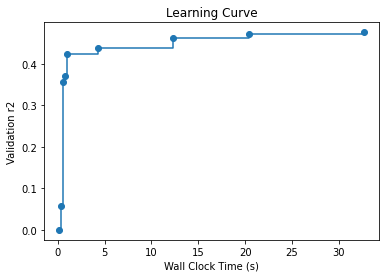

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

plt.title('Learning Curve')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation r2')
plt.scatter(time_history, 1-np.array(valid_loss_history))
plt.step(time_history, 1-np.array(best_valid_loss_history), where='post')
plt.show()

In [ ]:
print('flaml r2', '=', 1 - sklearn_metric_loss_score('r2', y_pred, y_test))

flaml r2 = -0.12913752913752896


In [ ]:
from lightgbm import LGBMClassifier
lg=LGBMClassifier(class_weight={0:.00004, 1:1}
    )
lg.fit(X_train,y_train)
ypred = lg.predict(X_test)
print('With score : ',confusion_matrix(y_test,ypred))

With score :  [[54 89]
 [ 1 29]]


In [ ]:
from lightgbm import LGBMClassifier
lg=LGBMClassifier(class_weight={0:.051, 1:1},
               colsample_bytree=0.972627087956522, learning_rate=1.0,
               max_bin=255, min_child_weight=6.593466365649129, n_estimators=29,
               num_leaves=5, objective='binary',
               reg_alpha=7.297049314454462e-08, reg_lambda=1.0)
lg.fit(X_train,y_train)
ypred = lg.predict(X_test)
print('With score : ',confusion_matrix(y_test,ypred))

With score :  [[52 91]
 [ 0 30]]
